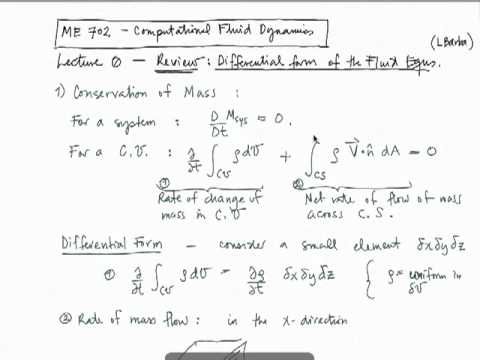

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
#Set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [4]:
def rho_green_light(x,rho_light):
    rho=numpy.zeros_like(x)
    mask=numpy.where(x<2.0)
    rho[mask]=rho_light*x[mask]/2.0
    return rho

In [5]:
#Set parameters
nx=81 #number of locations on the road
L = 4.0 #length of the road
dx = L/(nx-1) #distance between two consecutive locations
nt = 30 #number of time steps to compute
u_max = 1.0 #max speed allowed on the road
rho_max = 10.0 #max car density allowed on the road
rho_light = 10.0 #car density at the stoplight

#Discretize the road
x=numpy.linspace(0.0,L, num=nx)

#Compute the initial traffic density
rho0 = rho_green_light(x, rho_light)

(-0.5, 11.0)

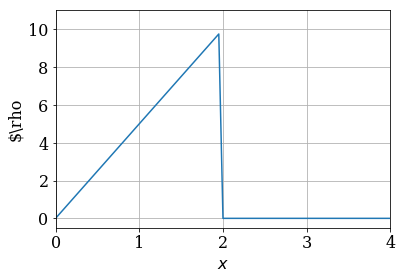

In [6]:
#Plot the initial car density on the road
pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho')
pyplot.grid()
pyplot.plot(x, rho0)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)

In [7]:
def flux(rho, u_max, rho_max):
    F=rho*u_max*(1.0-rho/rho_max)
    return F

In [8]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho=rho0.copy()
    for n in range(nt):
        #Compute the Flux
        F=flux(rho,*args)
        #Advance in time
        rho[1:]=rho[1:]-dt/dx*(F[1:]-F[:-1])
        #Set the left boundary condition.
        rho[0]=bc_value
        #Record the time-step solution
        rho_hist.append(rho.copy())
    return rho_hist

In [9]:
#Set the time-step size base on CFL limit
sigma = 1.0
dt = sigma*dx/u_max #time-step size

#Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [10]:
from matplotlib import animation
from IPython.display import HTML

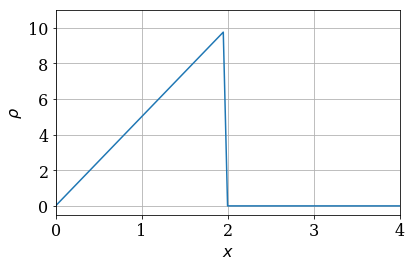

In [11]:
#Plot the initial traffic density
fig=pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line=pyplot.plot(x, rho0)[0]
pyplot.xlim(0.0,L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [12]:
def update_plot(n, rho_hist):
    pyplot.figure()
    pyplot.xlabel('Distance [km]')
    pyplot.ylabel('Density [cars/km]')
    pyplot.grid()
    pyplot.plot(x,rho_hist[0], label='Initial')
    pyplot.plot(x,rho_hist[n], label='Time step{}'.format(n))
    pyplot.ylim(rho_hist[0].min()-1.0, rho_hist[0].max()+1.0)
    pyplot.legend()

In [13]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=30), Output()), _dom_classes=('widget-in…

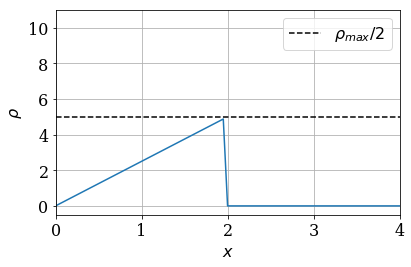

In [14]:
#Modify some parameters.
nt = 40 # number of time steps to compute
rho_light=5.0 # car densiry at the stoplight

#Compute the initial traffic density
rho0 = rho_green_light(x,rho_light)

#plot the initial traffic density
fig=pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line=pyplot.plot(x, rho0)
pyplot.hlines(rho_max/2.0, 0.0, L, label=r'$\rho_{max}/2$', color ='black', linestyle='--')
pyplot.legend()
pyplot.xlim(0.0,L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [15]:
#compute the traffic density at all time steps.
rho_hist=ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [16]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [18]:
#Set parameters.
rho_light = 4.0
u_max = 1.1

#compute the initial traffic density
rho0 = rho_green_light(x,rho_light)

#Compute the traffic density at all time steps.
rho_hist=ftbs(rho0, nt, dt, dt, rho0[0], u_max, rho_max)

import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…